In [1]:
!pip install kaggle
"""
To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. 
Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'. 
This will trigger the download of kaggle.json, a file containing your API credentials.
Upload that file to google colab/google cloud platform 
"""
api_token = {"username":"surabhimv","key":"6486570e714dc5adf89e540c7913012d"}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c 'telstra-recruiting-network'



  0% 0.00/557k [00:00<?, ?B/s]
100% 557k/557k [00:00<00:00, 38.4MB/s]


In [3]:
!unzip telstra-recruiting-network.zip

Archive:  telstra-recruiting-network.zip
  inflating: event_type.csv.zip      
  inflating: log_feature.csv.zip     
  inflating: resource_type.csv.zip   
  inflating: sample_submission.csv.zip  
  inflating: severity_type.csv.zip   
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [5]:
!unzip event_type.csv.zip

Archive:  event_type.csv.zip
replace event_type.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
!unzip log_feature.csv.zip

Archive:  log_feature.csv.zip
replace log_feature.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
!unzip resource_type.csv.zip

Archive:  resource_type.csv.zip
replace resource_type.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
!unzip severity_type.csv.zip

Archive:  severity_type.csv.zip
  inflating: severity_type.csv       


In [12]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [14]:
import pandas as pd
df1=pd.read_csv('event_type.csv')
print(df1)

         id     event_type
0      6597  event_type 11
1      8011  event_type 15
2      2597  event_type 15
3      5022  event_type 15
4      5022  event_type 11
...     ...            ...
31165  3761  event_type 11
31166  8720  event_type 11
31167  6488  event_type 11
31168   878  event_type 11
31169  4464  event_type 11

[31170 rows x 2 columns]


In [15]:
df2=pd.read_csv('log_feature.csv')
print(df2)

         id  log_feature  volume
0      6597   feature 68       6
1      8011   feature 68       7
2      2597   feature 68       1
3      5022  feature 172       2
4      5022   feature 56       1
...     ...          ...     ...
58666  8720  feature 209       1
58667  6488   feature 54       3
58668   878   feature 62       1
58669  4464  feature 209       1
58670  4464   feature 87       2

[58671 rows x 3 columns]


In [16]:
df3=pd.read_csv('resource_type.csv')
print(df3)

         id    resource_type
0      6597  resource_type 8
1      8011  resource_type 8
2      2597  resource_type 8
3      5022  resource_type 8
4      6852  resource_type 8
...     ...              ...
21071  3761  resource_type 8
21072  8720  resource_type 8
21073  6488  resource_type 8
21074   878  resource_type 8
21075  4464  resource_type 8

[21076 rows x 2 columns]


In [17]:
df4=pd.read_csv('severity_type.csv')
print(df4)

         id    severity_type
0      6597  severity_type 2
1      8011  severity_type 2
2      2597  severity_type 2
3      5022  severity_type 1
4      6852  severity_type 1
...     ...              ...
18547  3761  severity_type 1
18548  8720  severity_type 1
18549  6488  severity_type 2
18550   878  severity_type 2
18551  4464  severity_type 1

[18552 rows x 2 columns]


In [18]:
df5=pd.read_csv('train.csv')
print(df5)

         id       location  fault_severity
0     14121   location 118               1
1      9320    location 91               0
2     14394   location 152               1
3      8218   location 931               1
4     14804   location 120               0
...     ...            ...             ...
7376    870   location 167               0
7377  18068   location 106               0
7378  14111  location 1086               2
7379  15189     location 7               0
7380  17067   location 885               0

[7381 rows x 3 columns]


In [19]:
df=pd.read_csv('test.csv')
print(df)

          id       location
0      11066   location 481
1      18000   location 962
2      16964   location 491
3       4795   location 532
4       3392   location 600
...      ...            ...
11166  14806  location 1073
11167   1825    location 11
11168   2374   location 917
11169   7277   location 208
11170   9886   location 438

[11171 rows x 2 columns]


In [20]:
import re
d=df4['severity_type'].values
s=[]
print(d)
for i in d:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s.append(int(q1))

df4['severity_type']=s
print(df4)



['severity_type 2' 'severity_type 2' 'severity_type 2' ...
 'severity_type 2' 'severity_type 2' 'severity_type 1']
         id  severity_type
0      6597              2
1      8011              2
2      2597              2
3      5022              1
4      6852              1
...     ...            ...
18547  3761              1
18548  8720              1
18549  6488              2
18550   878              2
18551  4464              1

[18552 rows x 2 columns]


In [21]:

d1=df3['resource_type'].values
s1=[]

for i in d1:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s1.append(int(q1))

df3['resource_type']=s1
print(df3)

         id  resource_type
0      6597              8
1      8011              8
2      2597              8
3      5022              8
4      6852              8
...     ...            ...
21071  3761              8
21072  8720              8
21073  6488              8
21074   878              8
21075  4464              8

[21076 rows x 2 columns]


In [22]:

d2=df2['log_feature'].values
s2=[]

for i in d2:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s2.append(int(q1))

df2['log_feature']=s2
print(df2)

         id  log_feature  volume
0      6597           68       6
1      8011           68       7
2      2597           68       1
3      5022          172       2
4      5022           56       1
...     ...          ...     ...
58666  8720          209       1
58667  6488           54       3
58668   878           62       1
58669  4464          209       1
58670  4464           87       2

[58671 rows x 3 columns]


In [23]:
import re
d1=df1['event_type'].values
s3=[]

for i in d1:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s3.append(int(q1))

df1['event_type']=s3
print(df1)

         id  event_type
0      6597          11
1      8011          15
2      2597          15
3      5022          15
4      5022          11
...     ...         ...
31165  3761          11
31166  8720          11
31167  6488          11
31168   878          11
31169  4464          11

[31170 rows x 2 columns]


In [24]:
import re
d5=df5['location'].values
s5=[]

for i in d5:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s5.append(int(q1))

df5['location']=s5
print(df5)

         id  location  fault_severity
0     14121       118               1
1      9320        91               0
2     14394       152               1
3      8218       931               1
4     14804       120               0
...     ...       ...             ...
7376    870       167               0
7377  18068       106               0
7378  14111      1086               2
7379  15189         7               0
7380  17067       885               0

[7381 rows x 3 columns]


In [25]:
dff= pd.merge(df1,df2,on='id')
dff1=pd.merge(dff,df3,on='id')
dff2=pd.merge(dff1,df4,on='id')
dff3=pd.merge(dff2,df5,on='id')
print(dff3)


         id  event_type  log_feature  volume  resource_type  severity_type  \
0      8011          15           68       7              8              2   
1      2588          15           82       9              8              1   
2      2588          15          201       5              8              1   
3      2588          15           80      15              8              1   
4      2588          15          203       5              8              1   
...     ...         ...          ...     ...            ...            ...   
61834  8114          11           54       1              8              2   
61835  8114          11           87       3              8              2   
61836   878          11           62       1              8              2   
61837  4464          11          209       1              8              1   
61838  4464          11           87       2              8              1   

       location  fault_severity  
0             1              

In [26]:
#EDA
dff3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              61839 non-null  int64
 1   event_type      61839 non-null  int64
 2   log_feature     61839 non-null  int64
 3   volume          61839 non-null  int64
 4   resource_type   61839 non-null  int64
 5   severity_type   61839 non-null  int64
 6   location        61839 non-null  int64
 7   fault_severity  61839 non-null  int64
dtypes: int64(8)
memory usage: 4.2 MB


In [27]:
dff3.describe()

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
count,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000
mean,9104.379469,24.887482,211.245411,8.390336,4.557334,1.441566,580.234836,0.549168
std,5387.274195,12.007950,94.919318,22.902491,2.863860,0.589572,318.089156,0.727701
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4353.000000,13.000000,134.000000,1.000000,2.000000,1.000000,304.000000,0.000000
50%,8981.000000,23.000000,228.000000,2.000000,2.000000,1.000000,607.000000,0.000000
75%,13664.000000,35.000000,306.000000,6.000000,8.000000,2.000000,834.000000,1.000000
max,18550.000000,54.000000,384.000000,877.000000,10.000000,5.000000,1126.000000,2.000000


In [28]:
dff3.isnull().value_counts()

id     event_type  log_feature  volume  resource_type  severity_type  location  fault_severity
False  False       False        False   False          False          False     False             61839
dtype: int64

In [29]:
dff3['fault_severity'].value_counts()                                           #data is imbalanced

0    36597
1    16524
2     8718
Name: fault_severity, dtype: int64

In [30]:
dff3.shape

(61839, 8)

In [31]:
dff3.corr()

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
id,1.000000,0.025938,-0.014022,-0.003244,-0.014514,0.025929,-0.026987,-0.045528
event_type,0.025938,1.000000,0.494708,0.061929,-0.614615,0.364120,-0.399109,-0.262184
log_feature,-0.014022,0.494708,1.000000,-0.006759,-0.464366,0.303330,-0.280521,-0.208400
volume,-0.003244,0.061929,-0.006759,1.000000,-0.045263,0.040748,0.016999,-0.027196
resource_type,-0.014514,-0.614615,-0.464366,-0.045263,1.000000,-0.340374,0.451229,0.285475
severity_type,0.025929,0.364120,0.303330,0.040748,-0.340374,1.000000,-0.365441,-0.325157
location,-0.026987,-0.399109,-0.280521,0.016999,0.451229,-0.365441,1.000000,0.270390
fault_severity,-0.045528,-0.262184,-0.208400,-0.027196,0.285475,-0.325157,0.270390,1.000000


Text(0.5, 0, 'log_feature')

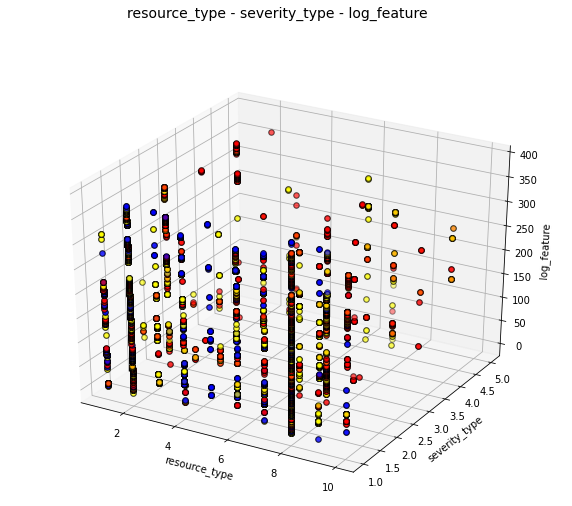

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
t = fig.suptitle('resource_type - severity_type - log_feature', fontsize=14)
ax = fig.add_subplot(111, projection='3d')


xs = list(dff3['resource_type'])
ys = list(dff3['severity_type'])
zs = list(dff3['log_feature'])


data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 0 else 'yellow' if wt==1 else 'blue' for wt in list(dff3['fault_severity'])]
data_points[0]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z,
               c=color,
               alpha=0.4,
               s=30,
               edgecolors='black'          # to remove edgecolors comment this parameter
              )

ax.set_xlabel('resource_type')
ax.set_ylabel('severity_type')
ax.set_zlabel('log_feature')

Text(0.5, 0, 'event_type')

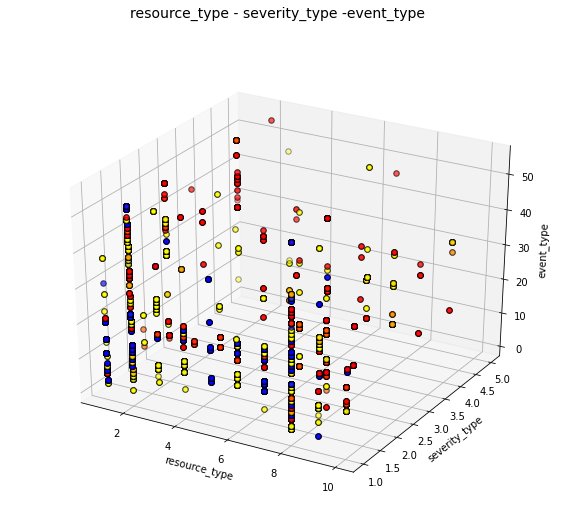

In [ ]:
fig = plt.figure(figsize = (10,8))
t = fig.suptitle('resource_type - severity_type -event_type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')


xs = list(dff3['resource_type'])
ys = list(dff3['severity_type'])
zs = list(dff3['event_type'])


data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 0 else 'yellow' if wt==1 else 'blue' for wt in list(dff3['fault_severity'])]
data_points[0]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z,
               c=color,
               alpha=0.4,
               s=30,
               edgecolors='black'          # to remove edgecolors comment this parameter
              )

ax.set_xlabel('resource_type')
ax.set_ylabel('severity_type')
ax.set_zlabel('event_type')

here overlapping of points are less.

Text(0.5, 0, 'id')

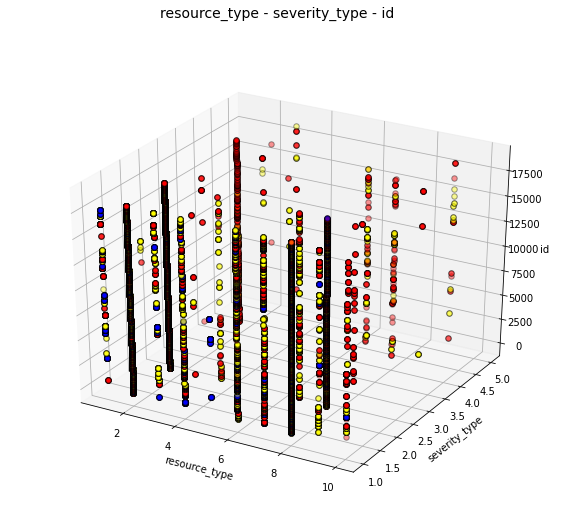

In [ ]:
fig = plt.figure(figsize = (10,8))
t = fig.suptitle('resource_type - severity_type - id', fontsize=14)
ax = fig.add_subplot(111, projection='3d')


xs = list(dff3['resource_type'])
ys = list(dff3['severity_type'])
zs = list(dff3['id'])


data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 0 else 'yellow' if wt==1 else 'blue' for wt in list(dff3['fault_severity'])]
data_points[0]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z,
               c=color,
               alpha=0.4,
               s=30,
               edgecolors='black'          # to remove edgecolors comment this parameter
              )

ax.set_xlabel('resource_type')
ax.set_ylabel('severity_type')
ax.set_zlabel('id')

Text(0.5, 0, 'location')

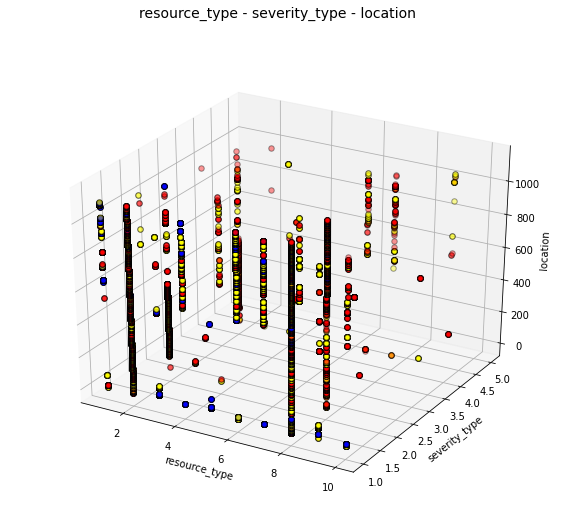

In [ ]:

fig = plt.figure(figsize = (10,8))
t = fig.suptitle('resource_type - severity_type - location', fontsize=14)
ax = fig.add_subplot(111, projection='3d')


xs = list(dff3['resource_type'])
ys = list(dff3['severity_type'])
zs = list(dff3['location'])


data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 0 else 'yellow' if wt==1 else 'blue'  for wt in list(dff3['fault_severity'])]
data_points[0]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z,
               c=color,
               alpha=0.4,
               s=30,
               edgecolors='black'          # to remove edgecolors comment this parameter
              )

ax.set_xlabel('resource_type')
ax.set_ylabel('severity_type')
ax.set_zlabel('location')

Text(0.5, 0, 'volume')

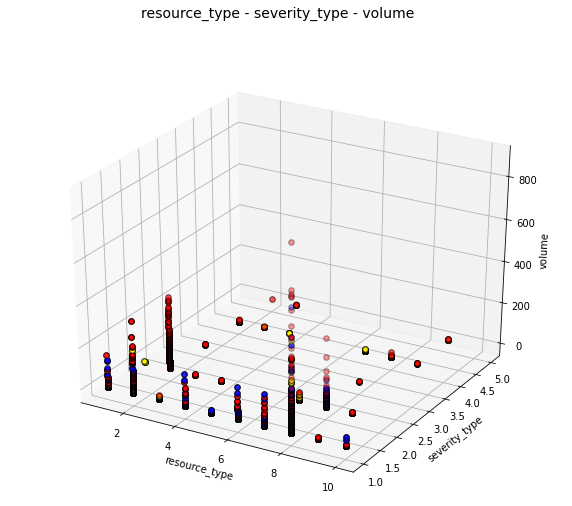

In [ ]:
fig = plt.figure(figsize = (10,8))
t = fig.suptitle('resource_type - severity_type - volume', fontsize=14)
ax = fig.add_subplot(111, projection='3d')


xs = list(dff3['resource_type'])
ys = list(dff3['severity_type'])
zs = list(dff3['volume'])


data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 0 else 'yellow' if wt==1 else 'blue' for wt in list(dff3['fault_severity'])]
data_points[0]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z,
               c=color,
               alpha=0.4,
               s=30,
               edgecolors='black'          # to remove edgecolors comment this parameter
              )

ax.set_xlabel('resource_type')
ax.set_ylabel('severity_type')
ax.set_zlabel('volume')

Text(0.5, 0, 'log_feature')

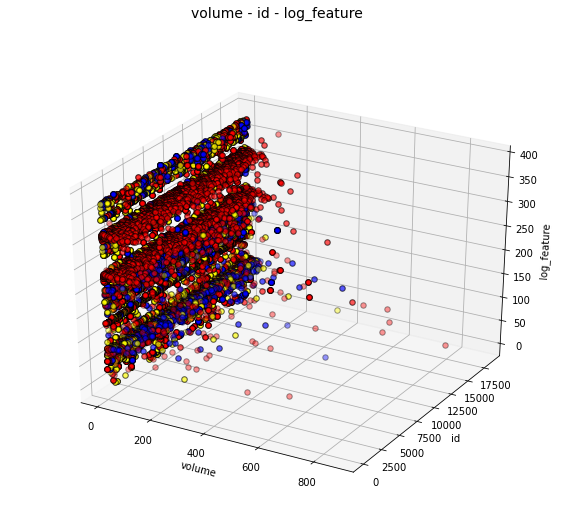

In [ ]:
fig = plt.figure(figsize = (10,8))
t = fig.suptitle('volume - id - log_feature', fontsize=14)
ax = fig.add_subplot(111, projection='3d')


xs = list(dff3['volume'])
ys = list(dff3['id'])
zs = list(dff3['log_feature'])


data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 0 else 'yellow' if wt==1 else 'blue' for wt in list(dff3['fault_severity'])]
data_points[0]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z,
               c=color,
               alpha=0.4,
               s=30,
               edgecolors='black'          # to remove edgecolors comment this parameter
              )

ax.set_xlabel('volume')
ax.set_ylabel('id')
ax.set_zlabel('log_feature')

Text(0.5, 0, 'log_feature')

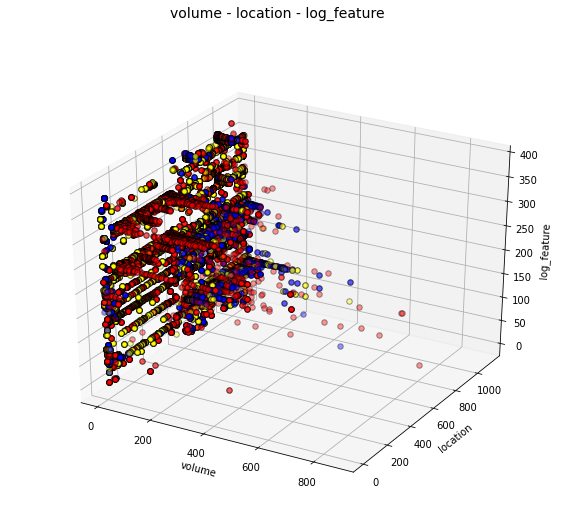

In [ ]:
fig = plt.figure(figsize = (10,8))
t = fig.suptitle('volume - location - log_feature', fontsize=14)
ax = fig.add_subplot(111, projection='3d')


xs = list(dff3['volume'])
ys = list(dff3['location'])
zs = list(dff3['log_feature'])


data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 0 else 'yellow' if wt==1 else 'blue'  for wt in list(dff3['fault_severity'])]
data_points[0]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z,
               c=color,
               alpha=0.4,
               s=30,
               edgecolors='black'          # to remove edgecolors comment this parameter
              )

ax.set_xlabel('volume')
ax.set_ylabel('location')
ax.set_zlabel('log_feature')

In [ ]:
dff3['fault_severity'].unique()

array([0, 2, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'tsne')]

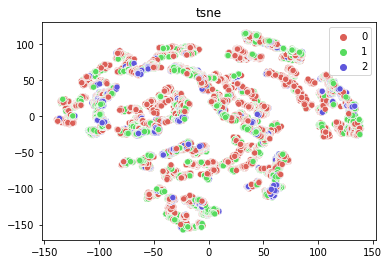

In [ ]:
#TSNE                                                                           #https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
from sklearn.manifold import TSNE
import seaborn as sns
xtsne=TSNE(perplexity=200,learning_rate=1000,n_iter=6000)
results=xtsne.fit_transform(dff3.drop(['fault_severity'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
data_y =dff3['fault_severity']

sns.scatterplot(vis_x,vis_y, hue=data_y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=dff3).set(title="tsne")

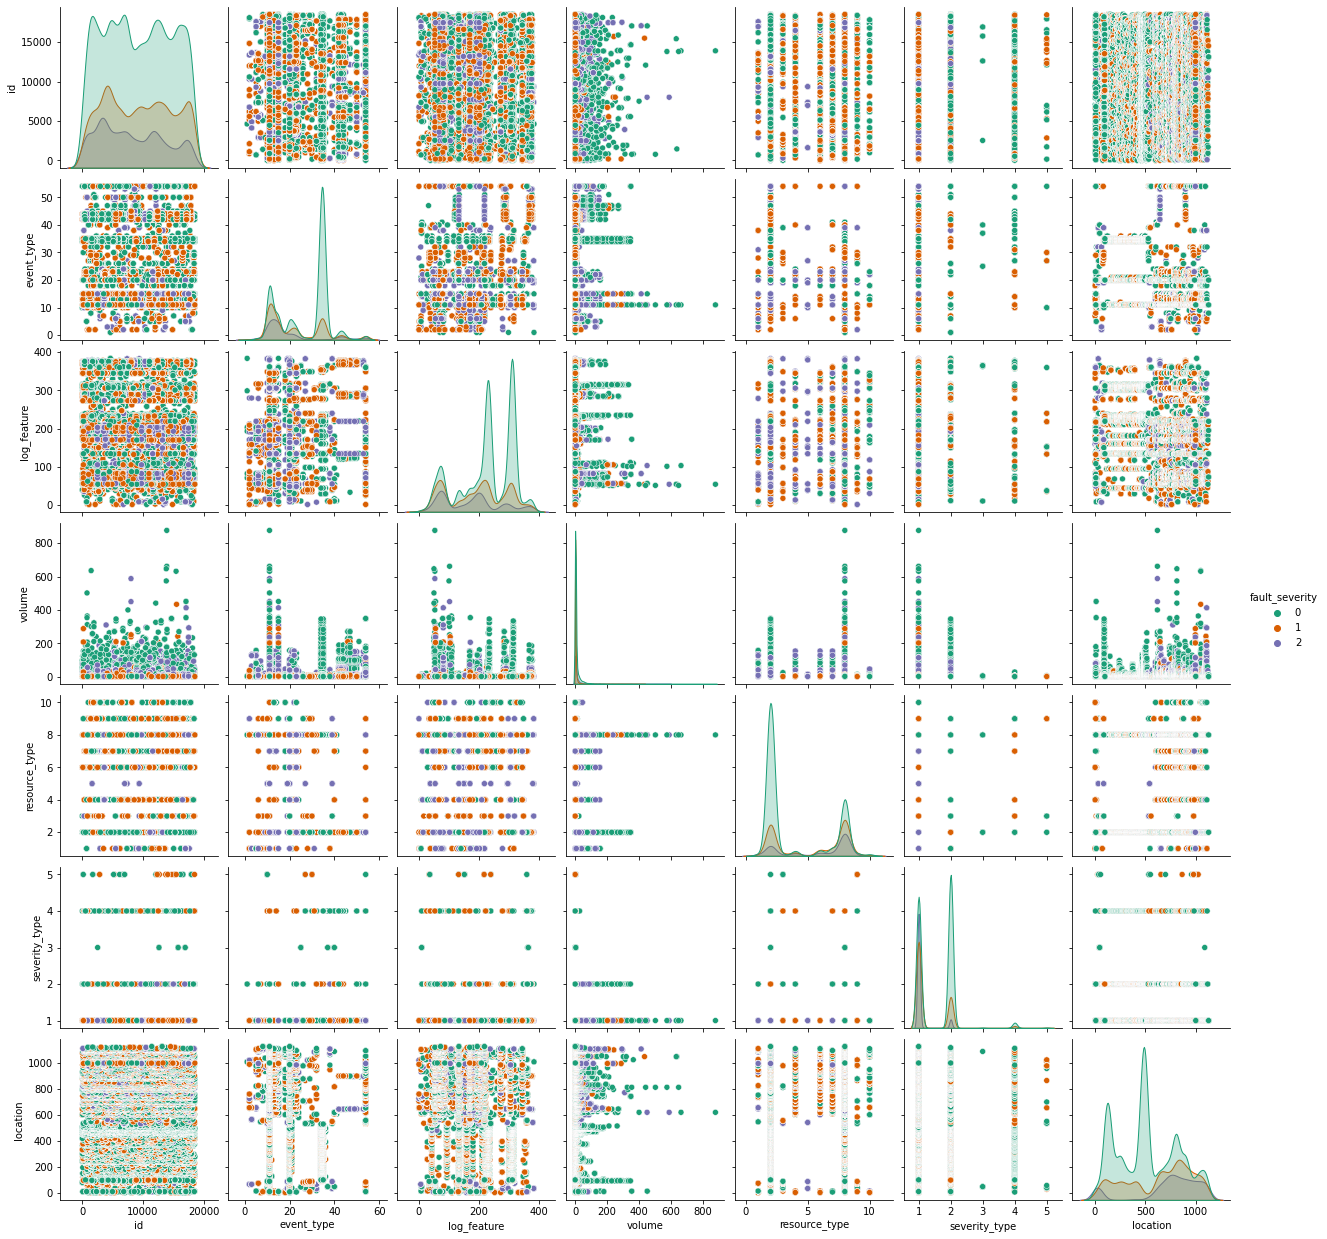

In [ ]:
#pair plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(dff3, hue="fault_severity",palette='Dark2')
plt.show()

from the above observation, resource type and severity type pairplot points are well separated than others.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

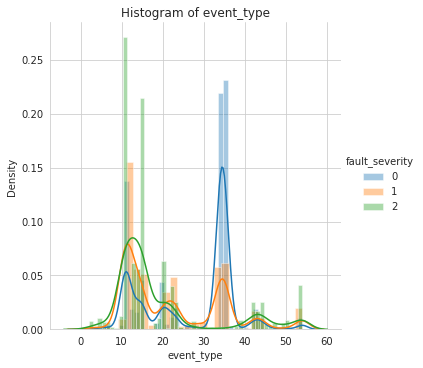

In [ ]:
import seaborn as sns
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot, "event_type") \
   .add_legend();
plt.title('Histogram of event_type') 
plt.show();

from this observation,density of points at lower event_type shows fault_severity(2) more and as the event_type increases btw(30 and 40) fault_severity(0) is more.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

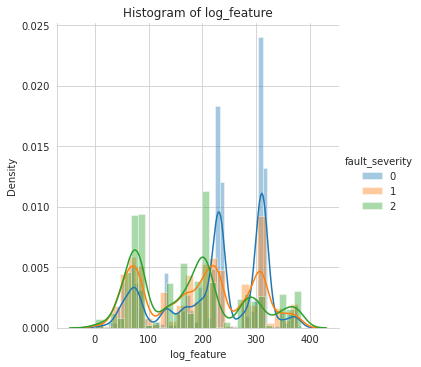

In [ ]:
import seaborn as sns
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot, "log_feature") \
   .add_legend();
plt.title('Histogram of log_feature') 
plt.show();

fault severity (0,1,2) are overlapping more but density of log feature points at(300)has (fault_severity 0) more.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

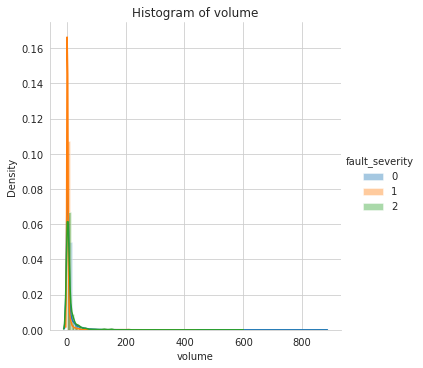

In [ ]:
import seaborn as sns
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot,'volume') \
   .add_legend();
plt.title('Histogram of volume') 
plt.show();

density of points at lesser volume has fault_severity (1) high.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

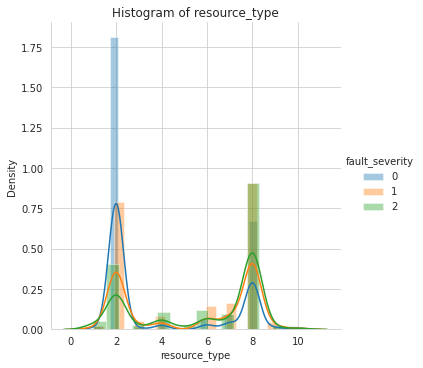

In [ ]:
import seaborn as sns
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot,'resource_type') \
   .add_legend();
plt.title('Histogram of resource_type') 
plt.show();

density of points at lesser resource_type has higher fault_severity(0).also fault_severity(0,1,2) are less overlapping so this feature is useful in predicting the output.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

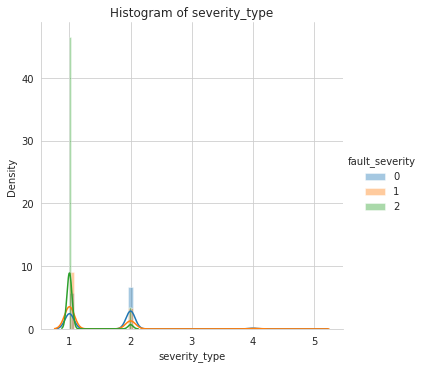

In [ ]:
import seaborn as sns
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot,'severity_type') \
   .add_legend();
plt.title('Histogram of severity_type') 
plt.show();

density of points at lower severity type has fault severit(2) is more.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

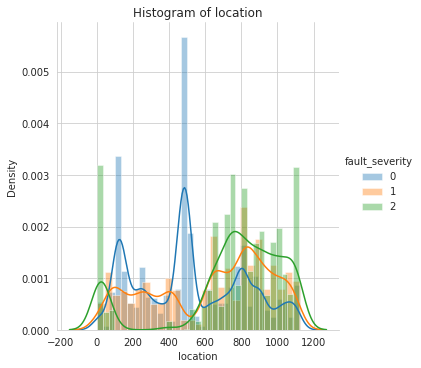

In [ ]:
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot,'location') \
   .add_legend();
plt.title('Histogram of location') 
plt.show();

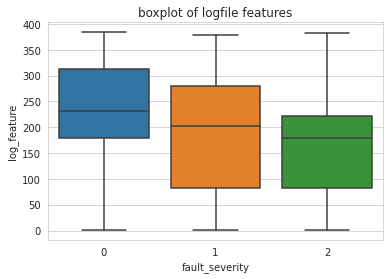

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt                                                 #boxplot representation of feature log_feature
ax = sns.boxplot(x="fault_severity", y="log_feature", data=dff3)                
plt.title("boxplot of logfile features")
plt.show()

In [ ]:
import numpy as np                                                              #https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
Q1 = np.percentile(dff3['log_feature'], 25,                                     #to detect and remove outliers
                   interpolation = 'midpoint')                   
 
Q3 = np.percentile(dff3['log_feature'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(dff3['log_feature'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(dff3['log_feature'] <= (Q1-1.5*IQR))
dff3.drop(upper[0],inplace=True)
dff3.drop(lower[0],inplace=True)

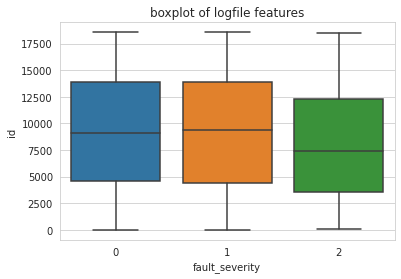

In [ ]:
ax = sns.boxplot(x="fault_severity", y="id", data=dff3)                         ##boxplot representation of feature id
plt.title("boxplot of logfile features")
plt.show()

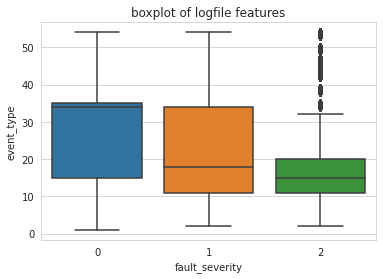

In [ ]:
ax = sns.boxplot(x="fault_severity", y="event_type", data=dff3)                 ##boxplot representation of feature event_type
plt.title("boxplot of logfile features")
plt.show()

In [ ]:
                 
Q1 = np.percentile(dff3['event_type'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dff3['event_type'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(dff3['event_type'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(dff3['event_type'] <= (Q1-1.5*IQR))
dff3.drop(upper[0],inplace=True)
dff3.drop(lower[0],inplace=True)

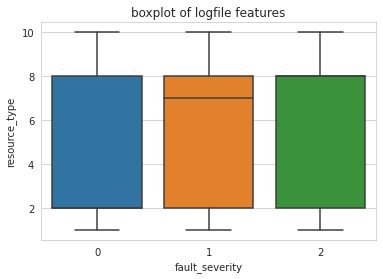

In [ ]:
ax = sns.boxplot(x="fault_severity", y="resource_type", data=dff3)              ##boxplot representation of feature resource_type
plt.title("boxplot of logfile features")
plt.show()

In [ ]:
Q1 = np.percentile(dff3['resource_type'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dff3['resource_type'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(dff3['severity_type'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dff3['severity_type'] <= (Q1-1.5*IQR))
dff3.drop(upper[0], inplace = True)
dff3.drop(lower[0], inplace = True)

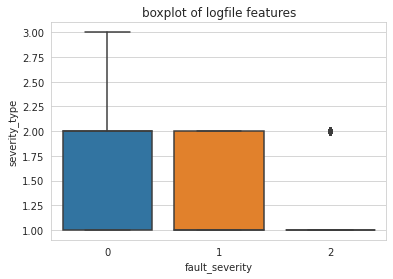

In [ ]:
ax = sns.boxplot(x="fault_severity", y="severity_type", data=dff3)              #boxplot representation of feature severity_type
plt.title("boxplot of logfile features")
plt.show()

In [ ]:
Q1 = np.percentile(dff3['severity_type'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dff3['severity_type'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(dff3['severity_type'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dff3['severity_type'] <= (Q1-1.5*IQR))
dff3.drop(upper[0], inplace = True)
dff3.drop(lower[0], inplace = True)

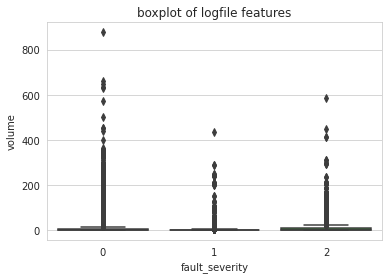

In [ ]:
ax = sns.boxplot(x="fault_severity", y="volume", data=dff3)                   #boxplot representation of feature location
plt.title("boxplot of logfile features")
plt.show()

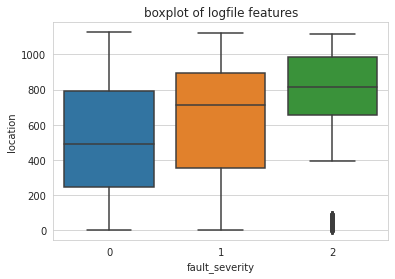

In [ ]:
ax = sns.boxplot(x="fault_severity", y="location", data=dff3)                   #boxplot representation of feature location
plt.title("boxplot of logfile features")
plt.show()

In [ ]:
Q1 = np.percentile(dff3['location'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dff3['location'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(dff3['location'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dff3['location'] <= (Q1-1.5*IQR))
dff3.drop(upper[0], inplace = True)
dff3.drop(lower[0], inplace = True)

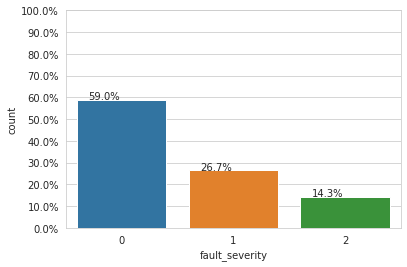

In [ ]:
import numpy as np                                                              #distribution of fault_severity
total = len(dff3)*1.
ax=sns.countplot(x="fault_severity", data=dff3)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [44]:
y=dff3['fault_severity']
X=dff3.drop(['fault_severity'],axis=1)
print(X)
print(y)

         id  event_type  log_feature  volume  resource_type  severity_type  \
0      8011          15           68       7              8              2   
1      2588          15           82       9              8              1   
2      2588          15          201       5              8              1   
3      2588          15           80      15              8              1   
4      2588          15          203       5              8              1   
...     ...         ...          ...     ...            ...            ...   
61834  8114          11           54       1              8              2   
61835  8114          11           87       3              8              2   
61836   878          11           62       1              8              2   
61837  4464          11          209       1              8              1   
61838  4464          11           87       2              8              1   

       location  
0             1  
1             1  
2        

In [ ]:
aa=dff3.to_csv('new_dataset.csv')

In [45]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33,stratify=y)
Xtrain,Xcv,ytrain,ycv=train_test_split(Xtrain,ytrain,test_size=0.33,stratify=ytrain)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)
print(Xcv.shape)
print(ycv.shape)


(27759, 7)
(27759,)
(20407, 7)
(20407,)
(13673, 7)
(13673,)


In [46]:
import numpy as np
print(np.unique(ycv))
print(np.unique(ytest))
print(np.unique(ytrain))

[0 1 2]
[0 1 2]
[0 1 2]


In [47]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
         # if (str(feature_name) != str('id') and str(feature_name)!=str('fault_severity')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(Xtrain)
Xtrain1=result
print(Xtrain1)

             id  event_type  log_feature    volume  resource_type  \
6470   0.737937    0.698113     0.018277  0.000000       0.000000   
27297  0.125775    0.641509     0.595300  0.071104       0.111111   
22077  0.395223    0.622642     0.616188  0.000000       0.777778   
50890  0.290366    0.188679     0.527415  0.010590       0.111111   
31023  0.418998    0.622642     0.605744  0.007564       0.111111   
...         ...         ...          ...       ...            ...   
57109  0.190415    0.396226     0.138381  0.001513       0.555556   
32734  0.381961    0.622642     0.812010  0.055976       0.111111   
15927  0.990026    0.641509     0.812010  0.000000       0.111111   
23822  0.791795    0.622642     0.801567  0.000000       0.111111   
272    0.974446    0.358491     0.532637  0.000000       0.111111   

       severity_type  location  
6470            0.00  0.979556  
27297           0.25  0.422222  
22077           0.00  0.346667  
50890           0.00  0.728889  
31023 

In [ ]:
Xtrain1.isnull().mean()

id               0.0
event_type       0.0
log_feature      0.0
volume           0.0
resource_type    0.0
severity_type    0.0
location         0.0
dtype: float64

In [ ]:
Xtest.isnull().mean()

id               0.0
event_type       0.0
log_feature      0.0
volume           0.0
resource_type    0.0
severity_type    0.0
location         0.0
dtype: float64

In [ ]:
Xcv.isnull().mean()

id               0.0
event_type       0.0
log_feature      0.0
volume           0.0
resource_type    0.0
severity_type    0.0
location         0.0
dtype: float64

In [41]:
import warnings
warnings.filterwarnings("ignore")
from multiprocessing import Process# this is used for multithreading
import multiprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#random model
yy=ytrain.values                                                                
print(yy)

y1=yy.reshape(-1, 1)

print(y1)
from sklearn.preprocessing import OneHotEncoder
def ohe(x):
  onehot_encoder = OneHotEncoder(sparse=False)
  onehot_encoded = onehot_encoder.fit_transform(x)
  hp=onehot_encoded.astype(int)
  return  hp
l1=ohe(y1)
print(l1[0])
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = Xtest.shape[0]
cv_data_len = Xcv.shape[0]

yt=ytest.values.reshape(-1,1)
yc=ycv.values.reshape(-1,1)
yte=ohe(yt)                                                                     #encoded y_test values
yce=ohe(yc)                                                                     #encoded y_cv values

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,3))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,3)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(yce,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,3))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,3)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(yte,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)                                #Returns the indices of the maximum values along an axis.

C = confusion_matrix(ytest, predicted_y)

print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

[0 0 0 ... 0 1 1]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]
[1 0 0]
Log loss on Cross Validation Data using Random Model 1.3206511454628174
Log loss on Test Data using Random Model 1.3341665094338118
confusion [[3898 3979 3969]
 [1739 1850 1774]
 [ 984  910  983]]
****************************************************************************************************
recal [[0.32905622 0.33589397 0.33504981]
 [0.32425881 0.34495618 0.33078501]
 [0.34202294 0.3163017  0.34167536]]
****************************************************************************************************
precision [[0.58873282 0.59044369 0.59009813]
 [0.26264915 0.27452144 0.2637526 ]
 [0.14861803 0.13503487 0.14614927]]


In [ ]:
#knn
alpha = [x for x in range(1, 20, 4)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i,weights='distance')
    k_cfl.fit(Xtrain1,ytrain)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(Xtrain1, ytrain)
    predict_y = sig_clf.predict_proba(Xcv)
    cv_log_error_array.append(log_loss(ycv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
best_alpha = np.argmin(cv_log_error_array)
    



In [ ]:
k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(Xtrain1,ytrain)
sig_clf1 = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf1.fit(Xtrain1, ytrain)
    
predict_y = sig_clf1.predict_proba(Xtrain1)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(ytrain, predict_y))
predict_y = sig_clf1.predict_proba(Xcv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(ycv, predict_y))
predict_y = sig_clf1.predict_proba(Xtest)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ytest, predict_y))



C = confusion_matrix(ytest, sig_clf1.predict(Xtest))
print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

For values of best alpha =  13 The train log loss is: 0.6314700017569118
For values of best alpha =  13 The cross validation log loss is: 0.9926058115856077
For values of best alpha =  13 The test log loss is: 0.9912332299535925
confusion [[10791   111   944]
 [ 4611    35   717]
 [ 2252    62   563]]
****************************************************************************************************
recal [[0.9109404  0.00937025 0.07968935]
 [0.85977997 0.0065262  0.13369383]
 [0.78275982 0.02155023 0.19568995]]
****************************************************************************************************
precision [[0.61124958 0.53365385 0.42446043]
 [0.26118727 0.16826923 0.32239209]
 [0.12756316 0.29807692 0.25314748]]


In [75]:

#logistic regression
alpha = [10 ** x for x in range(-10,1)]
print(alpha)
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l1',C=i,class_weight='balanced',solver='saga',n_jobs=-1)
    logisticR.fit(Xtrain1,ytrain)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(Xtrain1, ytrain)
    predict_y = sig_clf.predict_proba(Xcv)
    cv_log_error_array.append(log_loss(ycv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
best_alpha = np.argmin(cv_log_error_array)
    
logisticR=LogisticRegression(penalty='l1',C=alpha[best_alpha],class_weight='balanced',solver='saga',n_jobs=-1)
logisticR.fit(Xtrain1,ytrain)
sig_clf2 = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf2.fit(Xtrain1, ytrain)
pred_y=sig_clf2.predict(Xtest)

predict_y = sig_clf2.predict_proba(Xtrain1)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for train data',log_loss(ytrain, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf2.predict_proba(Xcv)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for cv data',log_loss(ycv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf2.predict_proba(Xtest)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for test data',log_loss(ytest, predict_y, labels=logisticR.classes_, eps=1e-15))

C = confusion_matrix(ytest, sig_clf2.predict(Xtest))
print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
For values of best alpha =  0.001 log loss for train data 0.9392780748227357
For values of best alpha =  0.001 log loss for cv data 0.939294442899062
For values of best alpha =  0.001 log loss for test data 0.9392904812772841
confusion [[12077     0     0]
 [ 5453     0     0]
 [ 2877     0     0]]
****************************************************************************************************
recal [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
****************************************************************************************************
precision [[0.59180673        nan        nan]
 [0.26721223        nan        nan]
 [0.14098104        nan        nan]]


In [ ]:
#random forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'min_samples_split':[2,5,10],'max_depth':[1,5,10,20,50],'n_estimators':[10,100,500,1000,1200]}

r_cfl=RandomForestClassifier()
clf=RandomizedSearchCV(r_cfl,parameters, cv=10, scoring='roc_auc',n_jobs=4)
clf.fit(Xtrain1,ytrain)



RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'max_depth': [1, 5, 10, 20, 50],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 500, 1000,
                                                         1200]},
                   scoring='roc_auc')

In [ ]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=1, min_samples_split=10, n_estimators=10)


In [ ]:
r_cfl=RandomForestClassifier(n_estimators=10,random_state=42,n_jobs=-1,class_weight='balanced_subsample',max_depth=1, min_samples_split=10)
r_cfl.fit(Xtrain1,ytrain)
sig_clf3 = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf3.fit(Xtrain1, ytrain)

predict_y = sig_clf3.predict_proba(Xtrain1)

print("The train log loss is:",log_loss(ytrain, predict_y))

predict_y = sig_clf3.predict_proba(Xtest)
print("The test log loss is:",log_loss(ytest, predict_y))
C = confusion_matrix(ytest, sig_clf3.predict(Xtest))
print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))

The train log loss is: 0.8371129878181723
The test log loss is: 0.9460291372214836
confusion [[12077     0     0]
 [ 5453     0     0]
 [ 2877     0     0]]
****************************************************************************************************
recal [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
****************************************************************************************************


In [77]:
from prettytable import PrettyTable
myTable = PrettyTable(["Model", "best_value_of_alpha()", "train logloss","test logloss"])
myTable.add_row([ "Random_model", "0", "1.3206511454628174","1.3341665094338118"])
myTable.add_row([ "KNN", "13", "0.6314700017569118","0.9912332299535925"])
myTable.add_row([ "Logistic_Regression", "0.001", "0.9392780748227357","0.9392904812772841"])
myTable.add_row(["Random_Forest", "d=1,s=10,e=10", "  0.8371129878181723",'0.9460291372214836'])

print(myTable)

+---------------------+-----------------------+----------------------+--------------------+
|        Model        | best_value_of_alpha() |    train logloss     |    test logloss    |
+---------------------+-----------------------+----------------------+--------------------+
|     Random_model    |           0           |  1.3206511454628174  | 1.3341665094338118 |
|         KNN         |           13          |  0.6314700017569118  | 0.9912332299535925 |
| Logistic_Regression |         0.001         |  0.9392780748227357  | 0.9392904812772841 |
|    Random_Forest    |     d=1,s=10,e=10     |   0.8371129878181723 | 0.9460291372214836 |
+---------------------+-----------------------+----------------------+--------------------+
